<a href="https://www.kaggle.com/code/clarkelee/x-ray?scriptVersionId=105613632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Xray Image classification with Deeplearning

* Author: Clarke Lee
* Date:12/09/2022
* Contact: ccark.d.lee@gmail.com


## Enviroment Setup

In [1]:
#*** Work enviroment setup ****

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import matplotlib.pyplot as plt #graph and chart tools
import numpy as np # linear algebra
import PIL #imagging process liberay

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#******* TensorFlow components
import tensorflow as tf # TenorFlow modual

from tensorflow import keras #deep learning API

from tensorflow.keras import layers #callable object that takes as 
#input one or more tensors and that outputs one or more tensors

from tensorflow.keras.models import Sequential # The Sequential model

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


## Download and explore the x-ray dataset

In [2]:
# Download chest-xray-pneumonia dataset
data_lists=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/'):
    for filename in filenames:
         data_lists.append(os.path.join(dirname, filename))   #all files directary has stored into the list.

print("This is the first item of the list",data_lists[0])

data_lists.pop(0) # remove the first item in the list

print("After removed the unwant file name",data_lists[0] )


            
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This is the first item of the list /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/.DS_Store
After removed the unwant file name /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg


In [3]:
image_count = len(data_lists)
print("There are {} images in the dataset".format(image_count))


# len(list(filenames.glob('*/*.jpg')))

There are 5218 images in the dataset


/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg


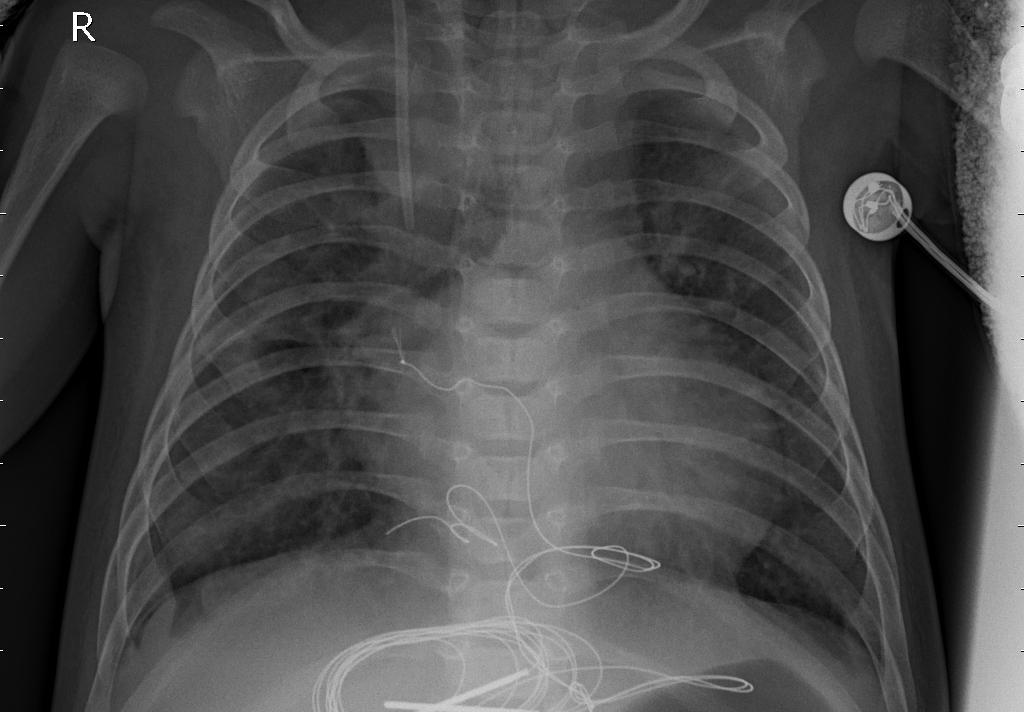

In [4]:
print(data_lists[0])
PIL.Image.open(data_lists[0])
# PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg")
# train_img = list(filenames)
# PIL.Image.open(train_img[0])



In [5]:
#seperate the list into two catalog
normal_list = [x for x in data_lists if "/NORMAL/" in x] 
# newlist = [x for x in fruits if "a" in x]

print(len(normal_list))

#normal_list

PNEUMONIA_list = [x for x in data_lists if "/PNEUMONIA/" in x]

print(len(PNEUMONIA_list))

1342
3876


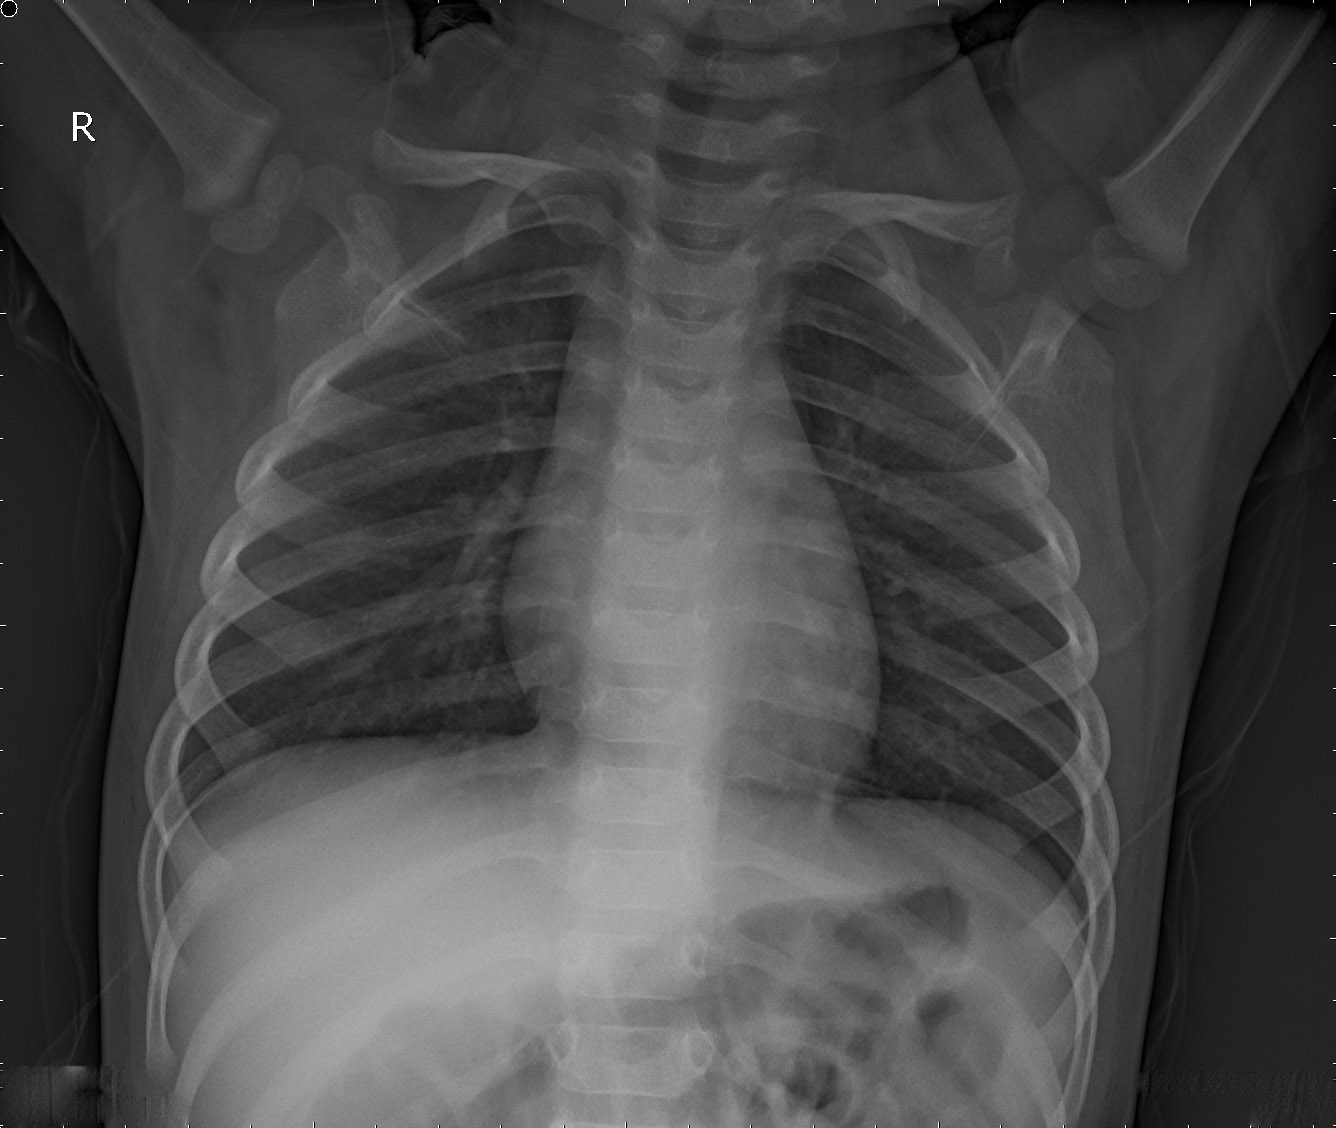

In [6]:
PIL.Image.open(normal_list[0])

This is the first item of the list /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
After removed the unwant file name /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
There are 9 in the folder
There are 9 in the folder


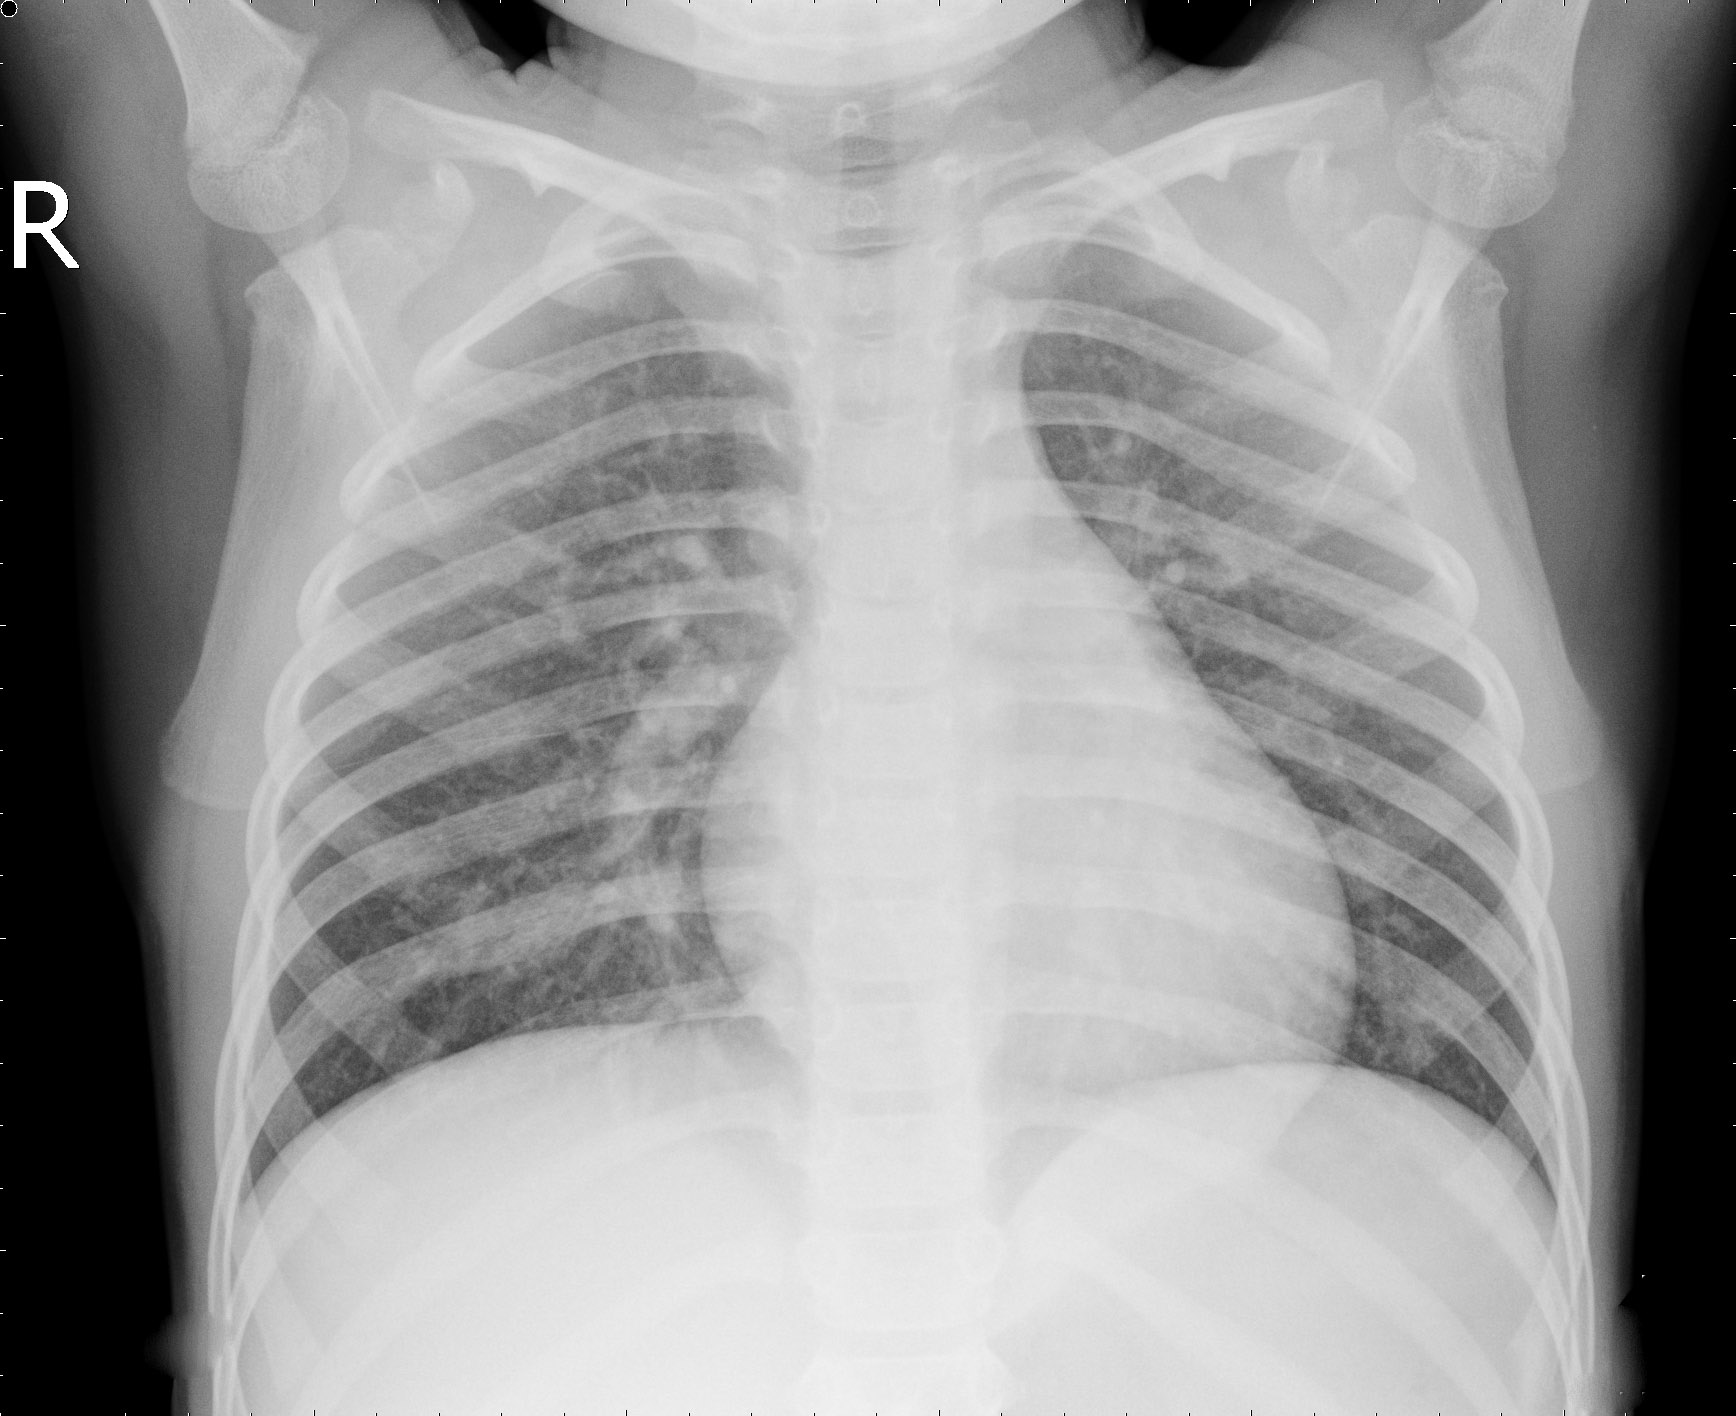

In [7]:
#variation data list
val_data_lists=[]

for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/'):
    for filename in filenames:
         val_data_lists.append(os.path.join(dirname, filename))   #all files directary has stored into the list.

print("This is the first item of the list",val_data_lists[0])

val_data_lists.pop(0) # remove the first item in the list

print("After removed the unwant file name",val_data_lists[0] )

#seperate the list into two catalog
val_normal_list = [x for x in val_data_lists if "/NORMAL/" in x] 
# newlist = [x for x in fruits if "a" in x]

print("There are {} in the folder".format(len(val_normal_list)))

#normal_list

val_PNEUMONIA_list = [x for x in val_data_lists if "/PNEUMONIA/" in x]

print("There are {} in the folder".format(len(val_PNEUMONIA_list)))

PIL.Image.open(val_normal_list[0])

This is the first item of the list /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/.DS_Store
After removed the unwant file name /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg
There are 234 files 
There are 390 files in the folder


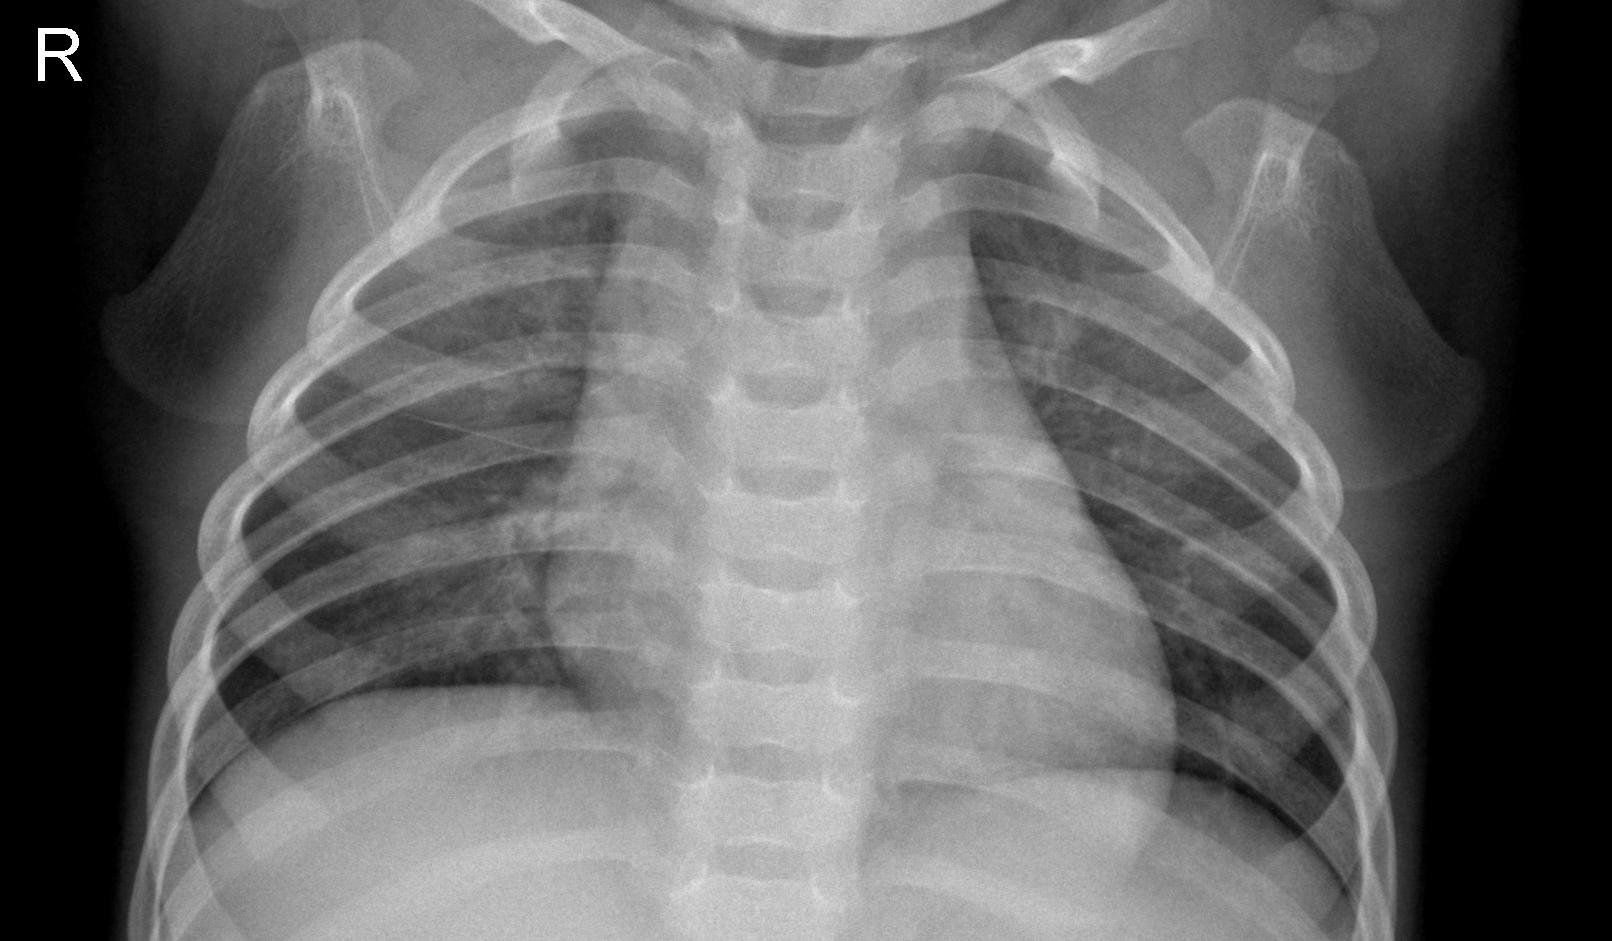

In [8]:
#Test data list
test_data_lists=[]

for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/'):
    for filename in filenames:
         test_data_lists.append(os.path.join(dirname, filename))   #all files directary has stored into the list.

print("This is the first item of the list",test_data_lists[0])

test_data_lists.pop(0) # remove the first item in the list

print("After removed the unwant file name",test_data_lists[0] )

#seperate the list into two catalog
test_normal_list = [x for x in test_data_lists if "/NORMAL/" in x] 
# newlist = [x for x in fruits if "a" in x]

print("There are {} files ".format(len(test_normal_list)))

#normal_list

test_PNEUMONIA_list = [x for x in test_data_lists if "/PNEUMONIA/" in x]

print("There are {} files in the folder".format(len(test_PNEUMONIA_list)))

PIL.Image.open(test_normal_list[0])

## Working with TensorFlow

In this session, I will use TensorFlow as tool to do classification

In [9]:
batch_size = 32 
data_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/"



train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,  #starting point of sequential
     batch_size=batch_size

)
train_ds

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


2022-09-14 01:29:09.943270: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
     batch_size=batch_size

)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


### first nine images from the training dataset:

2022-09-14 01:29:11.161099: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


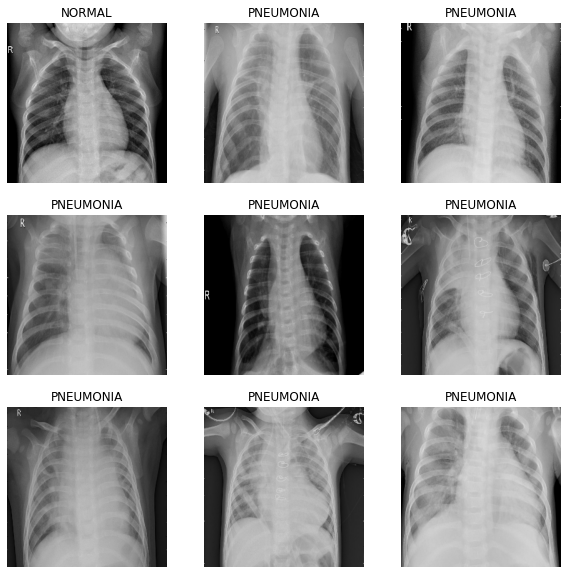

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

_____________
The image_batch is a tensor of the shape (32, 256, 256, 3). This is a batch of 32 images of shape 256x256x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.



In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


### Configure the dataset for performance

According the tutorial in [Tensorfolow image classification tutorial:](https://www.tensorflow.org/tutorials/load_data/images#configure_the_dataset_for_performance)
> * ***Dataset.cache*** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
> * ***Dataset.prefetch*** overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Standardize the data


In [15]:
# using tf.keras.layers.Rescaling to standardize

normalization_layer = layers.Rescaling(1./255) 

print(normalization_layer(0))

tf.Tensor(0.0, shape=(), dtype=float32)


2022-09-14 01:29:26.899317: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 52 of 1000
2022-09-14 01:29:36.768507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 111 of 1000


tf.Tensor(
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00238971 0.00238971 0.00238971]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.0509804  0.0509804  0.0509804 ]
  [0.0509804  0.0509804  0.0509804 ]
  [0.0509804  0.0509804  0.0509804 ]
  ...
  [0.02199755 0.02199755 0.02199755]
  [0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.01960784]]

 [[0.0509804  0.0509804  0.0509804 ]
  [0.0509804  0.0509804  0

2022-09-14 01:29:39.406561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


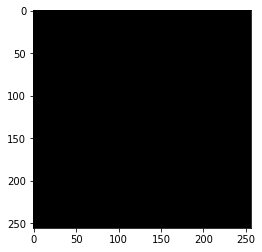

In [16]:
#normalize the entire dataset with the previous layer, which will rescaling pixal 255 time smaller
normalized_dataset = train_ds.map(lambda x, y:(normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

print(first_image) # 

plt.imshow(first_image.numpy().astype("uint8"))

### Create a basic model

Building a deep learning model with a convolution networks

In [17]:
img_height = 256
img_width = 256
num_outputs = len(class_names)
print("there {} class".format(num_outputs))

#there are three convolution layer in the networks

model = Sequential([
    
        layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_outputs)

])

# #model compiles

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

there 2 class


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

### Train the model

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 70s 523ms/step - loss: 0.4072 - accuracy: 0.8593 - val_loss: 0.0891 - val_accuracy: 0.9684
Epoch 2/10
131/131 [==============================] - 60s 460ms/step - loss: 0.1058 - accuracy: 0.9590 - val_loss: 0.0796 - val_accuracy: 0.9703
Epoch 3/10
131/131 [==============================] - 60s 455ms/step - loss: 0.0719 - accuracy: 0.9748 - val_loss: 0.0565 - val_accuracy: 0.9789
Epoch 4/10
131/131 [==============================] - 60s 457ms/step - loss: 0.0431 - accuracy: 0.9854 - val_loss: 0.0515 - val_accuracy: 0.9818
Epoch 5/10
131/131 [==============================] - 60s 456ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0552 - val_accuracy: 0.9808
Epoch 6/10
131/131 [==============================] - 59s 449ms/step - loss: 0.0268 - accuracy: 0.9897 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 7/10
131/131 [==============================] - 62s 474ms/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.0752 - val_ac

### Visualize training results
Create visualization for the training results in term of its accuracy and loss function

Text(0.5, 1.0, 'Training and Validation Loss function')

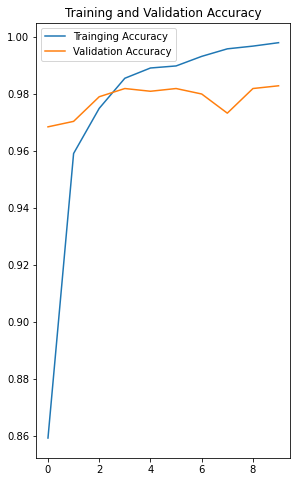

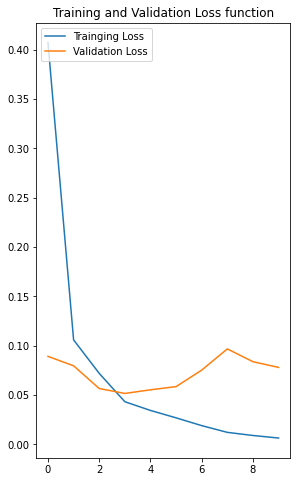

In [20]:
#plot the accuracy and loss chart
model_1_acc = history.history['accuracy']
model_1_val_acc = history.history['val_accuracy']

model_1_loss = history.history['loss']
model_1_val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,model_1_acc, label = 'Trainging Accuracy')
plt.plot(epochs_range,model_1_val_acc,label = 'Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(10,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,model_1_loss, label = 'Trainging Loss')
plt.plot(epochs_range,model_1_val_loss,label = 'Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss function')



### Dropout
This a method to correct model overfitting problem. 

According to explation on TensorFlow [Tutorials page](https://www.tensorflow.org/tutorials/images/classification#dropout)

Dropout is a regulation layer in the CNN which randomly drop out few random selected output units for a single gradient step in the training process. 
> Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

As stated in Machine Learning knowledge base on [developer.google.com](https://developers.google.com/machine-learning/glossary#dropout_regularization).
This regulation emulate an exponentially huge collection of smaller networks.


In [21]:
model_v2 = Sequential([
    
        layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_outputs,name="outputs")

])

In [22]:
model_v2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

In [24]:
epochs = 15
history2 = model_v2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
131/131 [==============================] - 62s 470ms/step - loss: 0.2509 - accuracy: 0.8984 - val_loss: 0.1129 - val_accuracy: 0.9569
Epoch 2/15
131/131 [==============================] - 64s 487ms/step - loss: 0.0915 - accuracy: 0.9691 - val_loss: 0.1096 - val_accuracy: 0.9616
Epoch 3/15
131/131 [==============================] - 62s 476ms/step - loss: 0.0834 - accuracy: 0.9691 - val_loss: 0.1352 - val_accuracy: 0.9482
Epoch 4/15
131/131 [==============================] - 62s 473ms/step - loss: 0.0542 - accuracy: 0.9803 - val_loss: 0.0538 - val_accuracy: 0.9808
Epoch 5/15
131/131 [==============================] - 63s 482ms/step - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.0713 - val_accuracy: 0.9712
Epoch 6/15
131/131 [==============================] - 61s 470ms/step - loss: 0.0284 - accuracy: 0.9897 - val_loss: 0.0693 - val_accuracy: 0.9760
Epoch 7/15
131/131 [==============================] - 62s 472ms/step - loss: 0.0172 - accuracy: 0.9928 - val_loss: 0.0688 - val_ac

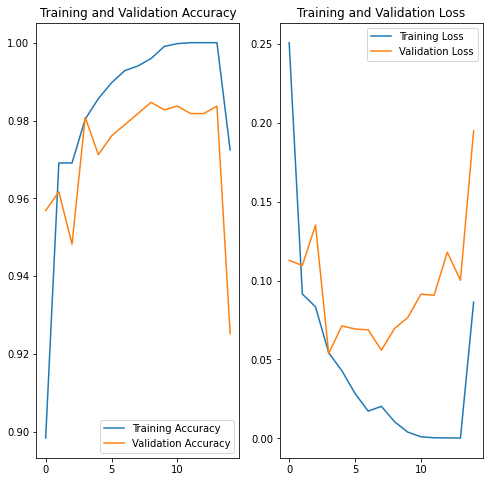

In [25]:
modal_2_acc = history2.history['accuracy']
modal_2_val_acc = history2.history['val_accuracy']

modal_2_loss = history2.history['loss']
modal_2_val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, modal_2_acc, label='Training Accuracy')
plt.plot(epochs_range, modal_2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, modal_2_loss, label='Training Loss')
plt.plot(epochs_range, modal_2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Test with test data


In [26]:
test_folder_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/'

#get data from local directory
test_folder_path = tf.keras.utils.image_dataset_from_directory(test_folder_dir) 

print(test_folder_path)


predictions = model.predict(test_folder_path)
score = tf.nn.softmax(predictions[2])

print(
    "This x-ray most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Found 16 files belonging to 2 classes.
<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
This x-ray most likely belongs to PNEUMONIA with a 100.00 percent confidence.
